# Datenanalyse mit KI & Machine Learning
## Logistische Regression

<h3>Klassifikation an Entscheidungsgrenzen</h3>
<p>Ähnlich wie beim K-Nearest-Neighbors-Verfahren (KNN) wird auch bei der Logistischen Regression die Zugehörigkeit von Einträgen zu Klassen bestimmt.</p>
<p>Im Unterschied zu KNN erfolgt diese Zuordnung jedoch nicht auf Basis benachbarter Punkte, sondern durch die Berechnung von Wahrscheinlichkeiten für (meist dichotome) Klassenzugehörigkeiten.</p>
<p>Zwischen den Klassen werden dabei Trennlinien berechnet (sogenannte Decision Boundaries), an denen die Wahrscheinlichkeiten für beide Klassen gleich sind (also 50/50). Liegt ein Punkt auf der einen Seite dieser Grenze, wird er der einen Klasse zugeordnet – liegt er auf der anderen Seite, der anderen Klasse.</p>
<p>Geringe Wahrscheinlichkeiten in der Nähe dieser Entscheidungsgrenzen weisen auf eine unsichere Zuordnung hin. Befindet sich ein Punkt hingegen deutlich entfernt von der Grenze, lässt sich seine Zugehörigkeit mit hoher Wahrscheinlichkeit bestimmen: Er gehört klar zur einen Klasse und mit sehr geringer Wahrscheinlichkeit zur anderen.</p>



In [287]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch
from scipy import stats
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
	mean_squared_error,
	confusion_matrix,
	ConfusionMatrixDisplay,
	classification_report
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Blobs: Logistische Regression zweier Klassen mit zwei Prädiktoren

In [288]:
blobs = make_blobs(
	n_samples=200,
	centers=2,
	cluster_std=1,
	center_box=(-3, 3),
	random_state=42,
	return_centers=True
)

In [289]:
X, y, centers = blobs

In [290]:
X

array([[-2.02464008e-01, -7.42411777e-03],
       [ 1.71468221e+00, -2.35280038e-01],
       [ 1.41647383e+00,  1.08994920e+00],
       [-1.81506300e+00,  3.17787827e+00],
       [ 1.67295552e+00, -3.07486146e-02],
       [ 3.53590774e+00,  1.22586993e+00],
       [ 1.50548100e+00,  1.25408158e+00],
       [ 9.17018340e-01, -6.13783274e-02],
       [-1.19927424e+00,  3.56068463e+00],
       [ 2.24962327e+00,  4.32012375e-01],
       [-6.92529077e-01,  5.16752795e+00],
       [ 2.29156353e+00,  8.99250426e-01],
       [ 6.50035024e-01,  1.30243478e+00],
       [ 1.93906103e+00,  3.89758253e-01],
       [-1.84930369e+00, -4.32436736e-01],
       [ 1.11301522e+00,  3.17811876e+00],
       [ 1.61605613e+00,  6.04543306e-01],
       [ 3.85946269e-01, -6.22237708e-01],
       [ 9.06600103e-01,  6.73825045e-01],
       [ 6.61597019e-01,  8.08409495e-01],
       [ 2.07391662e+00,  2.81684149e-01],
       [ 1.90699892e+00,  1.10573686e+00],
       [ 7.12889482e-01,  2.47850954e+00],
       [ 5.

In [291]:
y

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0])

In [292]:
centers

array([[-0.75275929,  2.70428584],
       [ 1.39196365,  0.59195091]])

In [293]:
X[:, 0]

array([-0.20246401,  1.71468221,  1.41647383, -1.815063  ,  1.67295552,
        3.53590774,  1.505481  ,  0.91701834, -1.19927424,  2.24962327,
       -0.69252908,  2.29156353,  0.65003502,  1.93906103, -1.84930369,
        1.11301522,  1.61605613,  0.38594627,  0.9066001 ,  0.66159702,
        2.07391662,  1.90699892,  0.71288948,  0.56296864, -0.42867532,
       -1.29714201,  1.89695093,  0.06978563,  0.49354898,  0.05976654,
       -0.78858533,  2.5551274 , -1.74329561, -0.39112326,  0.06075793,
        1.59102335,  0.39006353,  2.97798047, -0.66571222,  0.59944291,
        0.72513476,  1.80489511,  1.37971688,  1.74897914, -0.7397574 ,
        0.56646645, -0.39497193, -1.56125289, -0.49287649,  2.36708338,
       -0.73193207, -1.63661672, -0.86840757, -1.35339798,  0.33029196,
        0.46503318, -0.65568174, -0.45968681,  0.92092535,  0.410455  ,
        1.1838414 ,  0.63283099,  1.48963975, -0.68523108,  1.27742381,
       -2.30342272, -0.76625651,  2.01608347, -2.08094534, -0.40

In [294]:
centers[0]

array([-0.75275929,  2.70428584])

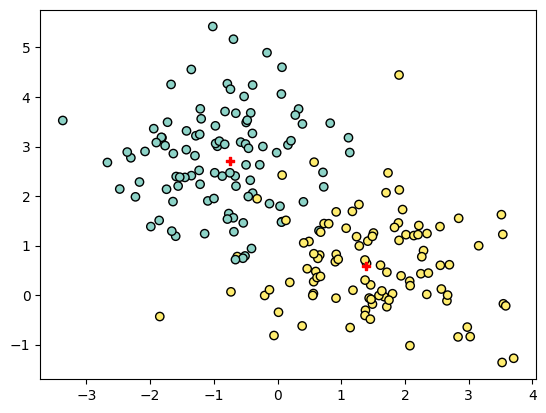

In [295]:
_, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, ec='black', cmap='Set3')
ax.scatter(centers[:, 0], centers[:, 1], c='red', marker='P');

In [296]:
# Jetzt Daten aufteilen mit train-test-split

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
													random_state=42)

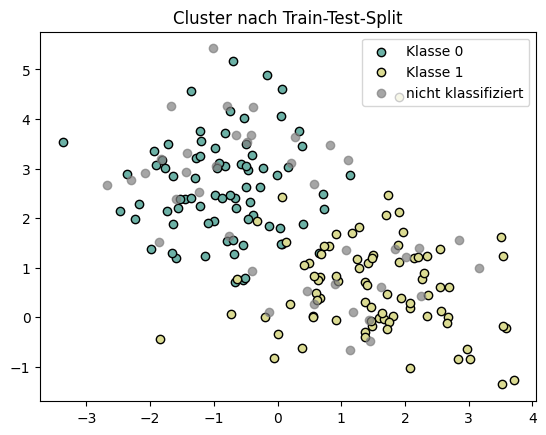

In [298]:
_, ax = plt.subplots()

ax.set(title='Cluster nach Train-Test-Split')

ax.scatter(
	X_train[y_train == 0][:, 0],
	X_train[y_train == 0][:, 1],
	c='#6cb1a6',
	ec='black',
	label='Klasse 0',
)

ax.scatter(
	X_train[y_train == 1][:, 0],
	X_train[y_train == 1][:, 1],
	c='#dbdb92',
	ec='black',
	label='Klasse 1',
)

ax.scatter(
	X_test[:, 0],
	X_test[:, 1],
	c='grey',
	alpha=0.7,
	label='nicht klassifiziert',
)

ax.legend();

In [299]:
# Mit den Trainingsdaten wird nun ein Modell der logistischen Regression trainiert.

In [300]:
# Classifier instantiieren:
classifier = LogisticRegression(random_state=42)

In [301]:
# Classifier trainieren:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [302]:
# Score an Trainingsdaten:
classifier.score(X_train, y_train)

0.95625

In [303]:
# Score an Testdaten:
classifier.score(X_test, y_test)

0.975

In [304]:
# Der Classifier funktioniert anhand von Wahrscheinlichkeiten für Klassenzugehörigkeiten:
classifier.predict_proba(X_test)
# In Zeile 8 haben wir z.B. einen Punkt, bei dem große Unsicherheit besteht, zu welcher Klasse er gehört,
# denn die Wahrscheinlichkeiten von Cluster 0 und Cluster 1 sind fast gleich!

array([[9.64367837e-01, 3.56321635e-02],
       [6.81121169e-01, 3.18878831e-01],
       [9.98676707e-01, 1.32329285e-03],
       [9.85076266e-01, 1.49237343e-02],
       [9.98270716e-01, 1.72928429e-03],
       [7.42119653e-01, 2.57880347e-01],
       [5.41515890e-01, 4.58484110e-01],
       [2.03275459e-03, 9.97967245e-01],
       [9.99626871e-01, 3.73128760e-04],
       [4.59731213e-02, 9.54026879e-01],
       [8.92780886e-01, 1.07219114e-01],
       [9.93040169e-01, 6.95983052e-03],
       [9.99789463e-01, 2.10536531e-04],
       [9.92231753e-01, 7.76824715e-03],
       [9.96804912e-01, 3.19508819e-03],
       [6.99733533e-04, 9.99300266e-01],
       [9.95190294e-01, 4.80970621e-03],
       [9.34791171e-02, 9.06520883e-01],
       [1.00915764e-02, 9.89908424e-01],
       [9.99113190e-01, 8.86809549e-04],
       [9.94145282e-01, 5.85471750e-03],
       [9.20068332e-03, 9.90799317e-01],
       [9.89900157e-01, 1.00998427e-02],
       [9.91099830e-01, 8.90017017e-03],
       [9.993100

In [305]:
# Basierend auf der höheren Wahrscheinlichkeit werden Klassenzuordnungen vorgenommen:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0])

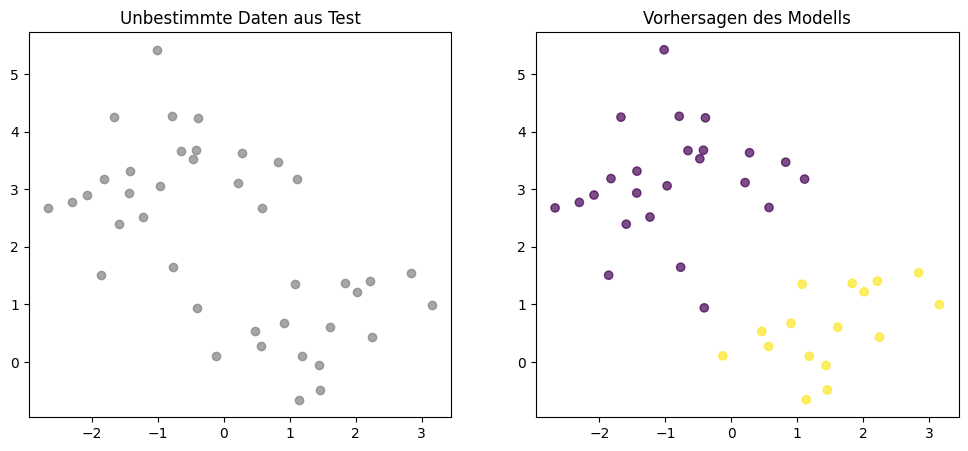

In [306]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set(title='Unbestimmte Daten aus Test')

ax1.scatter(
	X_test[:, 0],
	X_test[:, 1],
	c='grey',
	alpha=0.7,
	label='nicht klassifiziert',
)

ax2.set(title='Vorhersagen des Modells')

ax2.scatter(
	X_test[:, 0],
	X_test[:, 1],
	alpha=0.7,
	c=y_pred
);

In [307]:
# Dasselbe einmal für Train anschauen:
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [308]:
y_pred = classifier.predict(X_train)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1])

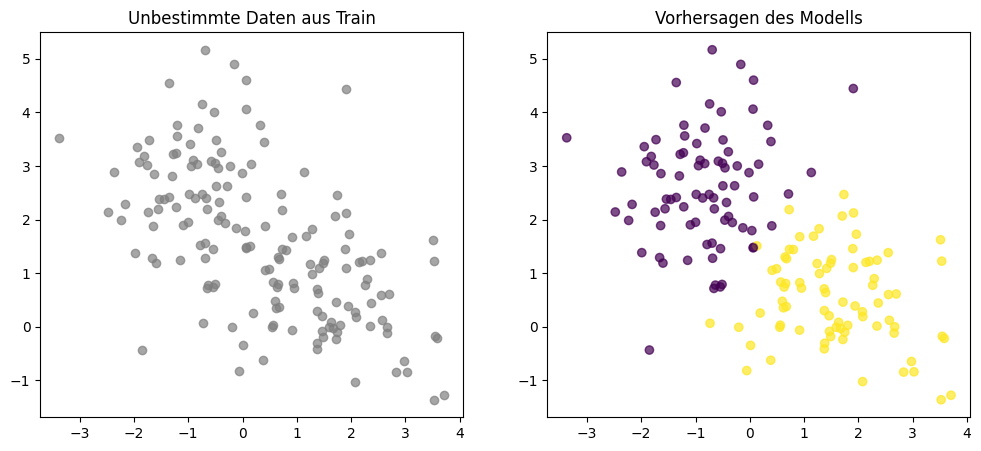

In [309]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set(title='Unbestimmte Daten aus Train')

ax1.scatter(
	X_train[:, 0],
	X_train[:, 1],
	c='grey',
	alpha=0.7,
	label='nicht klassifiziert',
)

ax2.set(title='Vorhersagen des Modells')

ax2.scatter(
	X_train[:, 0],
	X_train[:, 1],
	alpha=0.7,
	c=y_pred
);

In [310]:
X_train

array([[-1.35446590e+00,  4.55656402e+00],
       [-9.98147403e-01,  1.95054967e+00],
       [-6.65712219e-01,  2.40527849e+00],
       [-4.28675318e-01,  2.31920356e+00],
       [ 3.58176658e+00, -2.16347380e-01],
       [-8.29860996e-01,  3.04543781e+00],
       [ 5.97665355e-02,  4.06052587e+00],
       [ 6.61597019e-01,  8.08409495e-01],
       [-5.43895692e-01,  7.44615715e-01],
       [-3.37250439e+00,  3.52618834e+00],
       [ 3.54514611e+00, -1.75396658e-01],
       [ 9.51919164e-01,  7.22691482e-01],
       [ 3.53590774e+00,  1.22586993e+00],
       [-5.79578361e-01,  3.08960322e+00],
       [-2.23128128e+00,  1.98444163e+00],
       [ 3.82726601e-02,  1.79489838e+00],
       [ 2.26428429e+00,  7.75292911e-01],
       [-1.45481238e+00,  2.37662369e+00],
       [-7.87471057e-01,  1.53560780e+00],
       [-2.30817721e-01,  3.00127051e+00],
       [-4.56639010e-01,  2.96534111e+00],
       [ 3.51411985e+00,  1.62441617e+00],
       [ 2.55512740e+00,  6.02183966e-01],
       [ 6.

In [311]:
classifier.predict_proba(X_train)

array([[9.99753883e-01, 2.46117387e-04],
       [9.57940567e-01, 4.20594326e-02],
       [9.60744561e-01, 3.92554389e-02],
       [9.27647274e-01, 7.23527257e-02],
       [3.63296465e-05, 9.99963670e-01],
       [9.90364859e-01, 9.63514107e-03],
       [9.88814675e-01, 1.11853251e-02],
       [8.95887863e-02, 9.10411214e-01],
       [5.29060248e-01, 4.70939752e-01],
       [9.99979907e-01, 2.00933793e-05],
       [4.20785845e-05, 9.99957921e-01],
       [4.40656544e-02, 9.55934346e-01],
       [4.64835663e-04, 9.99535164e-01],
       [9.84927302e-01, 1.50726982e-02],
       [9.96936692e-01, 3.06330784e-03],
       [6.62442423e-01, 3.37557577e-01],
       [3.15195082e-03, 9.96848049e-01],
       [9.91948787e-01, 8.05121297e-03],
       [8.78201836e-01, 1.21798164e-01],
       [9.64208303e-01, 3.57916966e-02],
       [9.76083032e-01, 2.39169676e-02],
       [9.58100400e-04, 9.99041900e-01],
       [1.27359095e-03, 9.98726409e-01],
       [1.89370930e-01, 8.10629070e-01],
       [3.440831

In [312]:
# Lasst uns für die Bequemlichkeit einen Dataframe konstruieren:
classes_df = pd.DataFrame(X_train, columns=['class_0', 'class_1'])
classes_df.head()

,class_0,class_1
0,-1.354466,4.556564
1,-0.998147,1.950550
2,-0.665712,2.405278
3,-0.428675,2.319204
4,3.581767,-0.216347


In [313]:
probs = classifier.predict_proba(X_train)
probs_df = pd.DataFrame(probs, columns=['prob_0', 'prob_1'])

In [314]:
probs

array([[9.99753883e-01, 2.46117387e-04],
       [9.57940567e-01, 4.20594326e-02],
       [9.60744561e-01, 3.92554389e-02],
       [9.27647274e-01, 7.23527257e-02],
       [3.63296465e-05, 9.99963670e-01],
       [9.90364859e-01, 9.63514107e-03],
       [9.88814675e-01, 1.11853251e-02],
       [8.95887863e-02, 9.10411214e-01],
       [5.29060248e-01, 4.70939752e-01],
       [9.99979907e-01, 2.00933793e-05],
       [4.20785845e-05, 9.99957921e-01],
       [4.40656544e-02, 9.55934346e-01],
       [4.64835663e-04, 9.99535164e-01],
       [9.84927302e-01, 1.50726982e-02],
       [9.96936692e-01, 3.06330784e-03],
       [6.62442423e-01, 3.37557577e-01],
       [3.15195082e-03, 9.96848049e-01],
       [9.91948787e-01, 8.05121297e-03],
       [8.78201836e-01, 1.21798164e-01],
       [9.64208303e-01, 3.57916966e-02],
       [9.76083032e-01, 2.39169676e-02],
       [9.58100400e-04, 9.99041900e-01],
       [1.27359095e-03, 9.98726409e-01],
       [1.89370930e-01, 8.10629070e-01],
       [3.440831

In [315]:
probs_df

,prob_0,prob_1
0,0.999754,0.000246
1,0.957941,0.042059
2,0.960745,0.039255
3,0.927647,0.072353
4,0.000036,0.999964
...,...,...
155,0.005865,0.994135
156,0.704528,0.295472
157,0.991906,0.008094
158,0.200721,0.799279


In [316]:
classes_probs_df = pd.concat([classes_df, probs_df], axis=1)
classes_probs_df.head()

,class_0,class_1,prob_0,prob_1
0,-1.354466,4.556564,0.999754,0.000246
1,-0.998147,1.950550,0.957941,0.042059
2,-0.665712,2.405278,0.960745,0.039255
3,-0.428675,2.319204,0.927647,0.072353
4,3.581767,-0.216347,0.000036,0.999964


In [317]:
# Fälle:
# probs ab 0.9 = grün
# probs ab 0.8 = gelb
# probs ab 0.6 = orange
# der rest = rot

In [318]:
def colorize_prob(probs: tuple) -> str:
	"""
    Nimmt ein Tupel von vorhergesagten Klassenwahrscheinlichkeiten und gibt eine Farbe zurück, die das Konfidenzniveau anzeigt.

    Args:
        probs (tuple): Tupel von Wahrscheinlichkeiten aus classifier.predict_proba(X_Train), das die 
                      vorhergesagten Wahrscheinlichkeiten für jede Klasse enthält

    Returns:
        str: Farbe, die das Vorhersage-Konfidenzniveau repräsentiert:
            "green" für maximale Wahrscheinlichkeit >= 0.9 (sehr sicher)
            "yellow" für maximale Wahrscheinlichkeit >= 0.8 (sicher)
            "orange" für maximale Wahrscheinlichkeit >= 0.6 (unsicher)  
            "red" für maximale Wahrscheinlichkeit < 0.6 (sehr unsicher)
    """
	max_prob = max(probs)
	if max_prob >= 0.9:
		return "green"
	elif max_prob >= 0.8:
		return "yellow"
	elif max_prob >= 0.6:
		return "orange"
	else:
		return "red"

# Erklärung zur Verwendung von max():
### Wir verwenden max(), um die höchste Wahrscheinlichkeit aus dem Tupel zu ermitteln.
### Bei einer binären Klassifikation enthält das Tupel zwei Werte: die Wahrscheinlichkeit für Klasse 0 und für Klasse 1.
### Die höchste Wahrscheinlichkeit repräsentiert die Konfidenz des Modells in seine Vorhersage.

In [319]:
classes_probs_df['prob_color'] = classes_probs_df[['prob_0', 'prob_1']].apply(
	colorize_prob, axis=1)

In [320]:
classes_probs_df

,class_0,class_1,prob_0,prob_1,prob_color
0,-1.354466,4.556564,0.999754,0.000246,green
1,-0.998147,1.950550,0.957941,0.042059,green
2,-0.665712,2.405278,0.960745,0.039255,green
3,-0.428675,2.319204,0.927647,0.072353,green
4,3.581767,-0.216347,0.000036,0.999964,green
...,...,...,...,...,...
155,2.345965,1.243342,0.005865,0.994135,green
156,-1.849304,-0.432437,0.704528,0.295472,orange
157,-0.945120,3.005833,0.991906,0.008094,green
158,0.730177,1.444384,0.200721,0.799279,orange


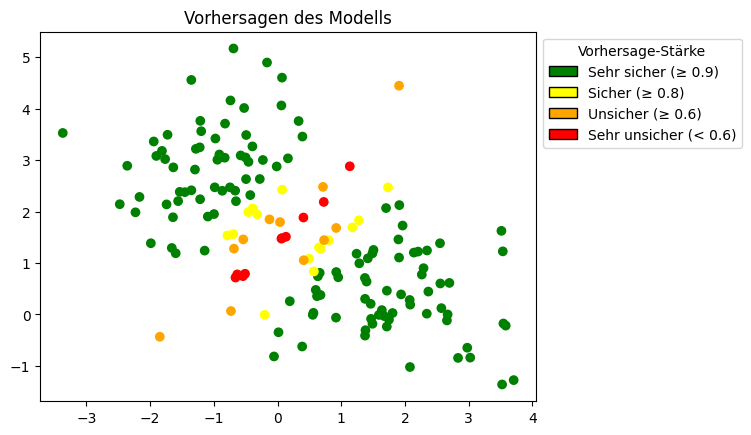

In [321]:
fig, ax = plt.subplots()

ax.set(title='Vorhersagen des Modells')

legend_elements = [
	Patch(facecolor='green', edgecolor='black', label='Sehr sicher (≥ 0.9)'),
	Patch(facecolor='yellow', edgecolor='black', label='Sicher (≥ 0.8)'),
	Patch(facecolor='orange', edgecolor='black', label='Unsicher (≥ 0.6)'),
	Patch(facecolor='red', edgecolor='black', label='Sehr unsicher (< 0.6)'),
]

scatter = ax.scatter(
	classes_probs_df['class_0'],
	classes_probs_df['class_1'],
	c=classes_probs_df['prob_color'],
)
ax.legend(
	handles=legend_elements,
	title='Vorhersage-Stärke',
	bbox_to_anchor=(1, 1),
	loc='upper left'
);

In [322]:
# 1. Beobachtung:
# ...
# Mehr hier: https://de.wikipedia.org/wiki/Sigmoidfunktion
# Oder hier: https://www.youtube.com/watch?v=yIYKR4sgzI8

In [323]:
# 2. Beobachtung:
# ...

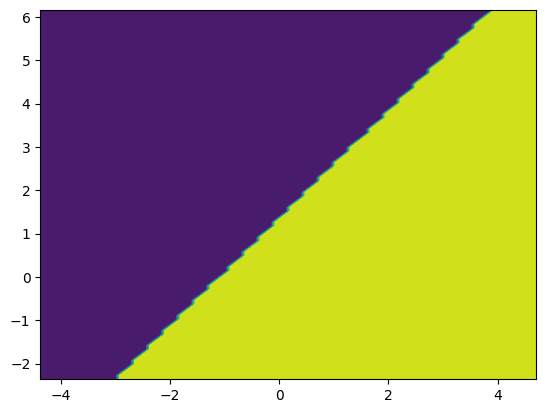

In [324]:
# Die Entscheidungsgrenze zwischen den Klassen:
DecisionBoundaryDisplay.from_estimator(
	classifier,
	X_train,
	response_method='predict',
);

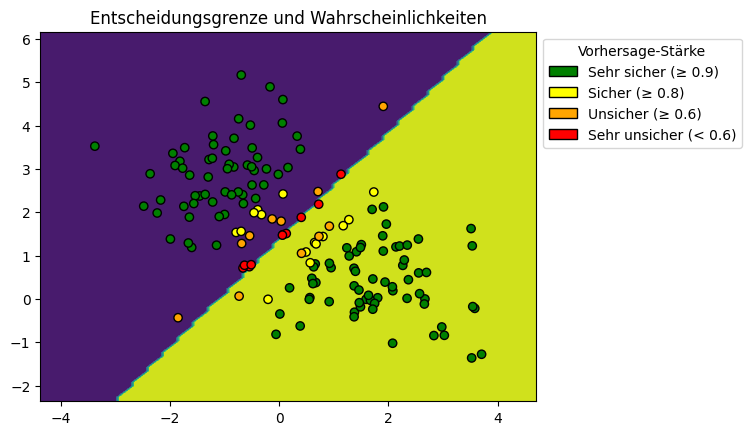

In [325]:
# Verbinden wir nun unsere beiden Grafiken!

display = DecisionBoundaryDisplay.from_estimator(
	classifier, X_train, response_method='predict'
)

display.ax_.set_title('Entscheidungsgrenze und Wahrscheinlichkeiten')

legend_elements = [
	Patch(facecolor='green', edgecolor='black', label='Sehr sicher (≥ 0.9)'),
	Patch(facecolor='yellow', edgecolor='black', label='Sicher (≥ 0.8)'),
	Patch(facecolor='orange', edgecolor='black', label='Unsicher (≥ 0.6)'),
	Patch(facecolor='red', edgecolor='black', label='Sehr unsicher (< 0.6)'),
]

display.ax_.scatter(
	classes_probs_df['class_0'],
	classes_probs_df['class_1'],
	ec='black',
	c=classes_probs_df['prob_color'],
)

display.ax_.legend(
	handles=legend_elements,
	title='Vorhersage-Stärke',
	bbox_to_anchor=(1, 1),
	loc='upper left'
);

In [326]:
# Es gilt: Je weiter die Punkte von der Entscheidungsgrenze entfernt, desto höher die Zugehörigkeit zur entsprechenden Klasse.
# Je näher die Punkte an der Entscheidungsgrenze, desto höher die Anteile für beide Klassen.
# Es muss also irgendwo eine "Grenze" geben, auf der die Wahrscheinlichkeit 50/50 ist.
# Diese kann man sich in scikitlearn auch grafisch anzeigen lassen!

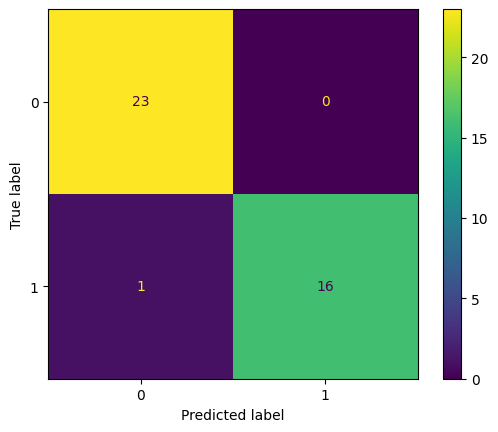

In [327]:
# Mit einer Confusion Matrix können wir ganz bequem wieder anschauen, wie gut unsere Vorhersagen waren:
y_pred = classifier.predict(X_test)
c_matrix = confusion_matrix(y_test, y_pred)

# Für eine schönere Darstellung:
c_matrix = ConfusionMatrixDisplay(c_matrix)
c_matrix.plot()
plt.show()
# 23 richtig Klasse 0 zugeordnet
# 16, richtig Klasse 1 zugeordnet
# 1 fehlerhaft der Klasse 0 zugeordnet

In [328]:
# Klassisch score ermitteln geht auch:
classifier.score(X_test, y_test)

0.975

### Cancer: Logistische Regression zweier Klassen mit vielen Prädiktoren

In [329]:
# Wie ist der Datensatz aufgebaut?
print(load_breast_cancer())

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], shape=(569, 30)), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,

In [330]:
# Was steht in der Beschreibung?
print(load_breast_cancer().DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [331]:
# Dataframe aus Daten, Spaltennamen von Prädiktoren sowie Zielvariablen bauen:
cancer = pd.DataFrame(
	load_breast_cancer().data,
	columns=load_breast_cancer().feature_names
)

cancer['benign'] = load_breast_cancer().target

cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [332]:
# Beachtlich:
len(cancer.columns)

31

In [333]:
# Leichte Imbalance:
cancer['benign'].value_counts()

benign
1    357
0    212
Name: count, dtype: int64

In [334]:
# Versuch 1 der logistischen Regression:
classifier = LogisticRegression()

In [335]:
X = load_breast_cancer().data
y = load_breast_cancer().target
classifier.fit(X, y)

C:\Users\Admin\OneDrive\Dokumente\DataCraft\DataAnalyst_Aug.24\11_Datenvisualisierung_mit_Python\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [361]:
# Die Daten müssen erst skaliert werden (also einheitlich gemacht):
def data_range(series):
	return series.max() - series.min()


print(cancer['mean radius'].agg(['min', 'max', data_range]))
print()
print(cancer['mean smoothness'].agg(['min', 'max', data_range]))

min            6.981
max           28.110
data_range    21.129
Name: mean radius, dtype: float64

min           0.05263
max           0.16340
data_range    0.11077
Name: mean smoothness, dtype: float64


In [362]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<Axes: >

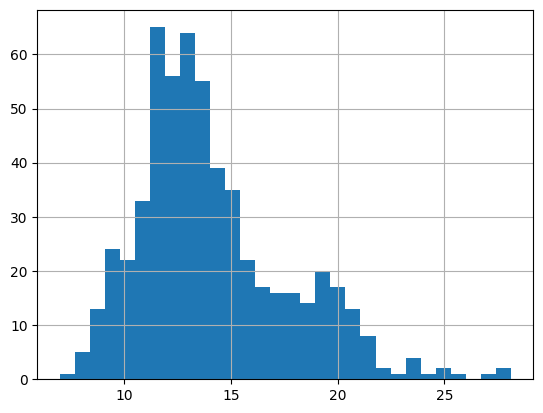

In [363]:
# Etwas linksschief, aber glockenkurvig und nah genug an Normalverteilung:
cancer['mean radius'].hist(bins=30)

In [366]:
# Man kann das auch mit normaltest aus scipy testen:
stats.normaltest(cancer['mean radius'])

NormaltestResult(statistic=np.float64(73.17938185797058), pvalue=np.float64(1.286172249506454e-16))

In [367]:
# Könnte man per Loop auf alle interessanten Spalten anwenden, sparen wir uns aber hier.

In [368]:
# Wir wollen alle Variablen in eine Standard-Normalverteilung überführen (Mittelwert = 0, Standardabweichung = 1).
# Die Verhältnisse bleiben dabei gewahrt, aber der Einfluss auf die Zielvariable wird dadurch vereinheitlicht.
X = load_breast_cancer().data
y = load_breast_cancer().target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [377]:
X_train

array([[1.289e+01, 1.312e+01, 8.189e+01, ..., 5.366e-02, 2.309e-01,
        6.915e-02],
       [1.340e+01, 2.052e+01, 8.864e+01, ..., 2.051e-01, 3.585e-01,
        1.109e-01],
       [1.296e+01, 1.829e+01, 8.418e+01, ..., 6.608e-02, 3.207e-01,
        7.247e-02],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, ..., 3.333e-02, 2.458e-01,
        6.120e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, ..., 1.827e-01, 3.179e-01,
        1.055e-01],
       [1.218e+01, 2.052e+01, 7.722e+01, ..., 7.431e-02, 2.694e-01,
        6.878e-02]], shape=(426, 30))

In [378]:
std_scaler = StandardScaler().fit(X_train)

In [383]:
print('Mittelwerte:')
print(std_scaler.mean_)
print('Anzahl Mittelwerte:', len(std_scaler.mean_))

Mittelwerte:
[1.41226643e+01 1.91988498e+01 9.18850235e+01 6.54919484e+02
 9.55561972e-02 1.02506714e-01 8.74703427e-02 4.77440869e-02
 1.80024413e-01 6.26067840e-02 4.02111737e-01 1.20767089e+00
 2.86367911e+00 4.01327254e+01 7.03638028e-03 2.53726854e-02
 3.22836148e-02 1.18490845e-02 2.04911479e-02 3.78268850e-03
 1.62118592e+01 2.55068779e+01 1.06886784e+02 8.73720657e+02
 1.31201831e-01 2.47729484e-01 2.67697533e-01 1.12653077e-01
 2.87796948e-01 8.33459390e-02]
Anzahl Mittelwerte: 30


In [380]:
# Jetzt wandeln wir X_train um:
X_train_scaled = std_scaler.transform(X_train)

In [381]:
X_train_scaled

array([[-0.34913849, -1.43851335, -0.41172595, ..., -0.91671059,
        -0.92508585, -0.80841115],
       [-0.20468665,  0.31264011, -0.13367256, ...,  1.43655962,
         1.14955889,  1.56911143],
       [-0.32931176, -0.21507235, -0.31739376, ..., -0.7237126 ,
         0.53496977, -0.61934827],
       ...,
       [ 0.04739597, -0.56293662, -0.06529202, ..., -1.23262438,
        -0.68282718, -1.261137  ],
       [-0.04040808,  0.09966199, -0.03151368, ...,  1.08847951,
         0.48944465,  1.26159953],
       [-0.5502381 ,  0.31264011, -0.6040977 , ..., -0.59582424,
        -0.29911546, -0.82948141]], shape=(426, 30))

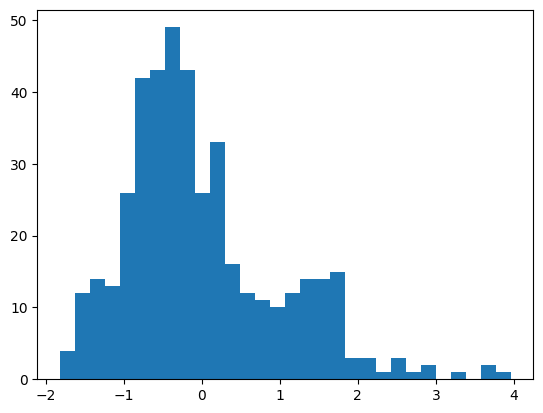

In [382]:
# Die skalierte Verteilung von Merkmal 0 ('mean radius'):
plt.hist(X_train_scaled[:, 0], bins=30);

In [375]:
# Test: Ist der Mittelwert wirklich bei 0 und die Standardabweichung 1?
print(X_train_scaled[:, 0].mean())
print(X_train_scaled[:, 0].std())

-1.1550489307837308e-15
1.0


In [349]:
# Jetzt transformieren wir auch noch die Testdaten.
# Achtung: Hier darf kein fit durchgeführt werden, weil es sonst zu Data Leakage kommen kann.
# Der Scaler soll einfach nur die Daten genau nach demselben Schema transformieren wie zuvor die Trainingsdaten, er soll aber mit fit nicht an diese angepasst werden (von ihnen lernen).
X_test_scaled = scaler.transform(X_test)

In [350]:
# Standardbweichung kommt von Train und ergibt hier deshalb nicht perfekt 0:
print(X_test_scaled[:, 0].mean())
print(X_test_scaled[:, 0].std())

0.005215165650847186
0.9890832027655274


In [351]:
# Ein neuer Versuch nach dieser Skalierungsaktion:
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [352]:
# Score bei Trainingsdaten:
classifier.score(X_train_scaled, y_train)

0.9859154929577465

In [353]:
# Accuracy Score (Anteil richtig geschätzter zu allen Datenpunkten):
classifier.score(X_test_scaled, y_test)

0.9790209790209791

In [354]:
y_pred = classifier.predict(X_test_scaled)

In [355]:
# So viel wurde falsch geschätzt:
mean_squared_error(y_test, y_pred)

0.02097902097902098

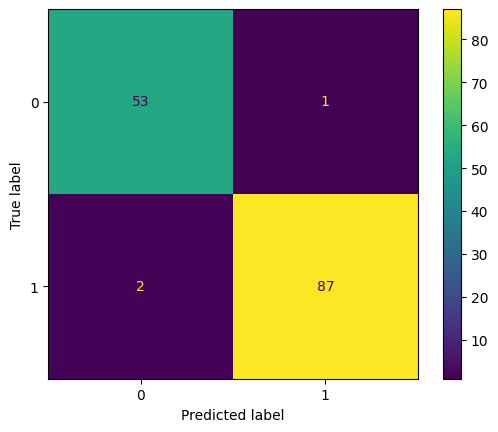

In [356]:
# Was sagt die Confusionmatrix?
# (Zur Erinnerung: 0 ist bösartig, 1 ist gutartig)
c_matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
c_matrix.plot()
plt.show()

In [357]:
# Precision: Anteil wahr Positiver an allen als positiv klassifizierten Fällen (z.B. 53/55 bzw. 87/88)
# Recall: Anteil wahr Positiver an allen tatsächlich positiven Fällen, also: TP / (TP + FN) (z.B. 53/54 bzw. 87/89)
# Der F1-Score misst das Gleichgewicht (den Kompromiss) zwischen Precision und Recall.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [358]:
# Bei der Krebsdiagnose ist der Recall für Klasse 0 besonders wichtig, da 0 hier für "bösartig" steht.
# Recall beschreibt – vereinfacht gesagt – den Anteil der korrekt erkannten bösartigen Tumoren
# bezogen auf die tatsächliche Gesamtzahl bösartiger Tumoren (also inklusive der übersehenen).
# Ein Recall von 0.98 ist ein sehr guter Wert.
# Für ein solideres Modell bräuchten wir aber eine deutlich größere Datenmenge.
